In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

Populating the interactive namespace from numpy and matplotlib


In [5]:
counts = pd.read_csv('Data/Brain1_treated_dt_tissue.tsv', sep='\t',index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes
print(counts.shape)
counts.iloc[:5, :5]

(16, 7825)


,ENSMUSG00000102331,ENSMUSG00000033845,ENSMUSG00000033813,ENSMUSG00000033793,ENSMUSG00000025907
20.01x17.08,0.0,0.0,0.0,0.0,1.0
20.01x18.1,1.0,0.0,0.0,2.0,5.0
20.98x16.03,0.0,0.0,0.0,0.0,1.0
20.99x17.02,0.0,0.0,0.0,0.0,0.0
21.0x18.1,1.0,0.0,0.0,0.0,3.0


In [33]:
sample_info = pd.DataFrame(0, index = counts.index, columns = ['x','y','total_counts'])
sample_info.loc[:,'x'] = [float(item.split('x')[0]) for item in sample_info.index]
sample_info.loc[:,'y'] = [float(item.split('x')[1]) for item in sample_info.index]
sample_info.loc[:,'total_counts'] = counts.sum(axis=1)
sample_info.head(5)

,x,y,total_counts
20.01x17.08,20.01,17.08,7003.0
20.01x18.1,20.01,18.10,10536.0
20.98x16.03,20.98,16.03,3635.0
20.99x17.02,20.99,17.02,5091.0
21.0x18.1,21.00,18.10,7549.0


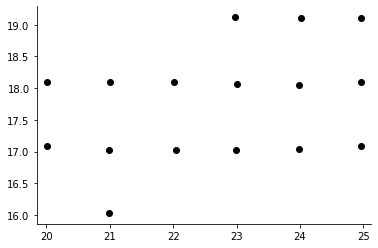

In [34]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k');
plt.axis('equal');

In [35]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

In [40]:
sample_resid_expr = resid_expr.sample(n=len(counts.columns), axis=1, random_state=1)

X = sample_info[['x', 'y']]
sample_resid_expr.head()
results = SpatialDE.run(X, sample_resid_expr)

In [41]:
results.head().T

,0,1,2,3,4
FSV,0.999954,2.02053e-09,2.02053e-09,0.999954,2.02053e-09
M,4,4,4,4,4
g,ENSMUSG00000057455,ENSMUSG00000028672,ENSMUSG00000029478,ENSMUSG00000101111,ENSMUSG00000026411
l,0.47,0.47,0.47,0.47,0.47
max_delta,4.53999e-05,4.85165e+08,4.85165e+08,4.53999e-05,4.85165e+08
max_ll,9.8016,17.0261,7.29248,1.8693,9.01983
max_mu_hat,1.56684,1.96996,0.0308108,1.9836,1.02251
max_s2_t_hat,1.9228,8.01317e-09,5.04577e-11,3.10077,2.19408e-09
model,SE,SE,SE,SE,SE
n,16,16,16,16,16


In [51]:
results.sort_values('qval').head(5)[['g', 'l', 'pval','qval']]

,g,l,pval,qval
0,ENSMUSG00000057455,0.47,0.667358,0.898384
5223,ENSMUSG00000105866,0.47,0.898384,0.898384
5222,ENSMUSG00000020029,0.47,0.898384,0.898384
5221,ENSMUSG00000015120,0.47,0.898384,0.898384
5220,ENSMUSG00000018678,0.47,0.898384,0.898384


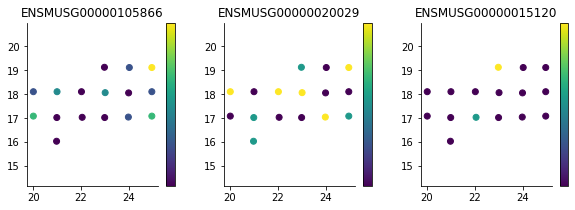

In [53]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000105866', 'ENSMUSG00000020029', 'ENSMUSG00000015120']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

In [54]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

,g,l,qval
2606,ENSMUSG00000065990,0.470000,0.898384
2605,ENSMUSG00000020255,0.470000,0.898384
2604,ENSMUSG00000022031,0.470000,0.898384
2603,ENSMUSG00000031633,0.470000,0.898384
2602,ENSMUSG00000032412,0.470000,0.898384
2601,ENSMUSG00000024208,0.470000,0.898384
2600,ENSMUSG00000017943,0.470000,0.898384
2599,ENSMUSG00000039536,0.470000,0.898384
2597,ENSMUSG00000074649,0.470000,0.898384
7824,ENSMUSG00000029156,2.667776,0.898384


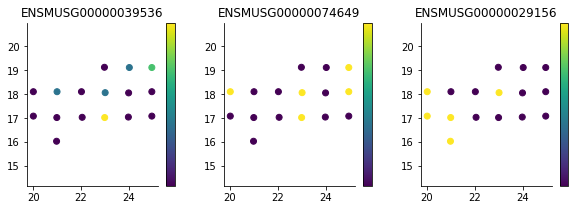

In [55]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000039536', 'ENSMUSG00000074649', 'ENSMUSG00000029156']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

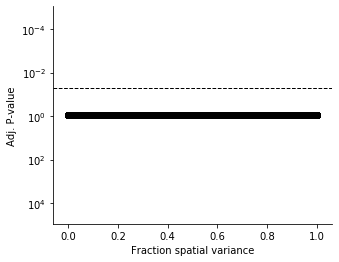

In [56]:
figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');

In [59]:
sign_results = results.query('qval < 0.5')
sign_results['l'].value_counts()


Series([], Name: l, dtype: int64)